In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as st
import operator as op
from matplotlib.widgets import Cursor

In [2]:
def read_sampels(file_names):
    samples = list()
    rows = list()

    for i in range (len (file_names)):
        samples.append(pd.read_excel(file_names[i], usecols= "C,D,F,I,K,L,M"))
        rows.append(len(samples[i]))
    
    return [samples, rows]

In [3]:
def LevelCheck (level, T, F):
    if level == 2:
        if (T+F) == 2:
            return 1
        else:
            return False
    elif level == 4:
        if (T+F) == 3:
            return 2
        else:
            return False
    elif level == 7:
        if (T+F) == 4:
            return 3
        else:
            return False
    elif level == 8:
        if (T+F) == 4:
            return 4
        else:
            return False
    elif level == 11:
        if (T+F) == 5:
            return 5
        else:
            return False

In [4]:
file_names = ['Clouds-Nikan1.xlsx',
              'Clouds-Nikan2.xlsx',
              'Clouds-Nikan3.xlsx',
              'Clouds-Nikan4.xlsx',
              'Clouds-Nikan5.xlsx',
              'Clouds-Nikan6.xlsx',
              'Clouds-Nikan7.xlsx']

[samples, rows] = read_sampels(file_names)
print(rows)

[1000, 533, 567, 989, 702, 453, 179]


In [5]:
def seperate_students_Acc(sample, rows):
    Students = []
    i=0
    while i in range(rows):
        ID = sample.iloc[i, 2]
        SameStudent = 1
        EachStudent = []
        while SameStudent:
            EachStudent.append([sample.iloc[i, 1], sample.iloc[i, 4], sample.iloc[i, 5]])
            i += 1
            if i == rows :
                break
            SameStudent = (sample.iloc[i, 2] == ID)
            
        
        Students.append(EachStudent)

    return Students

In [6]:
def seperating_students(sample, rows):
    Students = seperate_students_Acc(sample, rows)
    number_of_students = len(Students)
    return[Students, number_of_students]

In [7]:
def Acc_per_level_for_each(StudentSample):
    row = len(StudentSample)

    LevelsAccSum = np.zeros(5)  #the sum of accuracy for each level
    LevelNum = np.zeros(5)      #for counting each level's num

    for i in range(row):
        level = StudentSample[i][0]
        T = StudentSample[i][1]
        F = StudentSample[i][2]

        LIndex = LevelCheck(level, T, F)  

        if LIndex:
            Acc = T / (T+F)
            LevelNum[(LIndex-1)] += 1  
            LevelsAccSum[(LIndex-1)] += Acc

    LevelsAcc = [LevelsAccSum[i]/LevelNum[i] for i in range(5)]
    
    return LevelsAcc

In [8]:
def Accs_of_students(Students, number_of_students):
    Accs_of_stds = []
    for i in range(number_of_students):
        Accs_of_stds.append(Acc_per_level_for_each(Students[i]))

    return Accs_of_stds

In [9]:
def Each_levels_Acc(Accs, number_of_students):
    levels = []
    for j in range(5):
        temp = [Accs[i][j] for i in range(number_of_students)]
        levels.append([temp])
    return levels

In [10]:
def plot_scatter_of_levels(stds, levels):
    subplt=511
    LevelNames = ['2','4','7','8','11']
    for i in range(5):
        plt.figure(i+1)
        ##plt.subplot(subplt+i)
        plt.scatter(stds, levels[i])
        title = 'level '+LevelNames[i]
        plt.title(title)

C:\Users\manam\AppData\Local\Temp\ipykernel_20720\1089000730.py:19: RuntimeWarning: invalid value encountered in scalar divide
  LevelsAcc = [LevelsAccSum[i]/LevelNum[i] for i in range(5)]


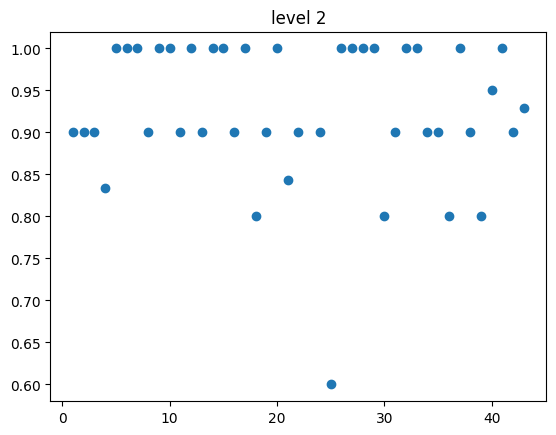

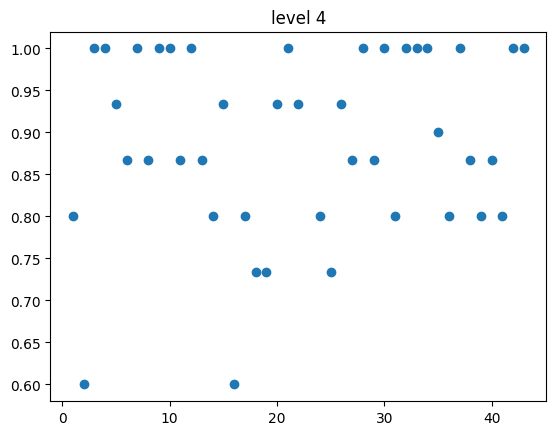

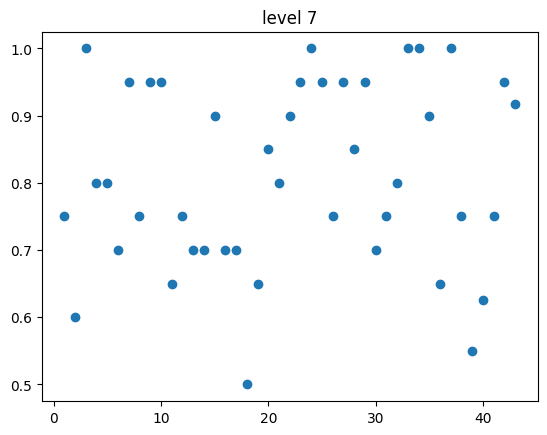

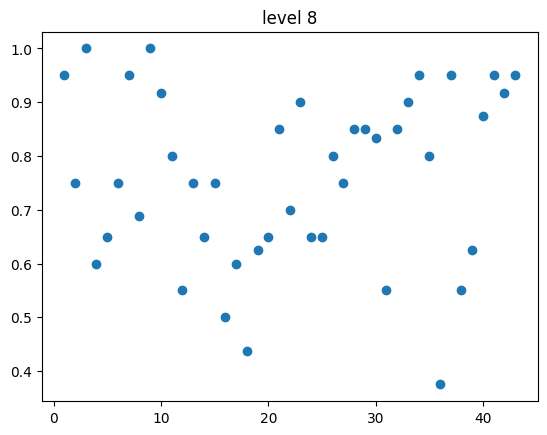

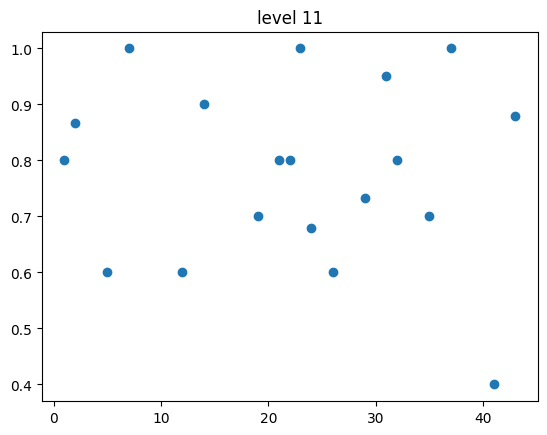

In [12]:
[Students, number_of_students] = seperating_students(samples[0], rows[0])

Accs = Accs_of_students(Students, number_of_students)

levels = Each_levels_Acc(Accs, number_of_students)

stds = range(1,number_of_students+1)

plot_scatter_of_levels(stds, levels)